# Plots for Machine Learning tasks

In [2]:
# Hide all warnings
import warnings
warnings.simplefilter('ignore')

# Data
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2, rc={'figure.figsize':(16,9)})

# Show plots directly within Jupyter Out
%matplotlib inline

# Titanic dataset (classification)

**Survived** is the target class variable we are trying to predict.

In [202]:
df = pd.read_csv('../../day_1/2_seminar_basics/data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Clean the dataset out off unimportant variables and convert important ones to numerical values

In [203]:
df = df.drop(['Ticket'], axis=1)
df = df.drop(['Cabin'], axis=1)
df = df.drop(['Name'], axis=1)
df['Fare'] = df['Fare'].fillna(0)
df['Fare'] = df['Fare'].astype(int)

ports = {'S': 0, 'C': 1, 'Q': 2}
sex = {'male': 0, 'female': 1}
df['Embarked'] = df['Embarked'].map(ports)
df['Sex'] = df['Sex'].map(sex)

df.dropna(inplace=True)

Now split the dataset on train and test parts to fit our model and evaluate it

In [177]:
from sklearn.model_selection import train_test_split

y = df['Survived']
X = df.drop('Survived', axis=1)

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.5, random_state=0)

**Decision tree** — hierarchy of simple rules labeling input vector of features by value of class and probability of class.

In [178]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=7,
    min_samples_leaf=3)

Train simple classifier (decision tree) calling the method `fit()` on training sample

In [179]:
classifier.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Method `predict()` of trained classifier gets features of observation from X and returns label of predicted class

In [180]:
test_predictions = classifier.predict(test_X)

test_predictions[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

Method `predict_proba()` returns probabilities of classes instead

In [181]:
test_probabilities = classifier.predict_proba(test_X)

test_probabilities[:10]

array([[0.53333333, 0.46666667],
       [0.90243902, 0.09756098],
       [0.        , 1.        ],
       [0.90243902, 0.09756098],
       [0.90243902, 0.09756098],
       [0.90243902, 0.09756098],
       [0.        , 1.        ],
       [0.75      , 0.25      ],
       [0.66666667, 0.33333333],
       [0.53333333, 0.46666667]])

## Evaluating quality of classifier

Common steps:
* train classifier on _training_ sample
* get predictions on _test_ sample that is **not intersected** with _train_ sample
* evaluate quality

## Metrics of classifier quality

Metrics show

* how well the model is generalized train data
* how well the model will fit new data

### Confusion Matrix

Обычно в задачах один класс важнее. Пусть класс $1$ *важнее* чем $0$.

Относительно *основного* (*целевого*) класса строится таблица количественных характеристик:

![Precision vs recall](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/563px-Precisionrecall.svg.png)

In [182]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(test_y, test_predictions)

pd.DataFrame(confusion)

,0,1
0,194,16
1,55,91


Function `confusion_matrix()` returns table in the following format:
* **rows** — **actual classes** of the sample
* **columns** — **predicted** labels of classes

|      -      |  Predicted `0` |  Predicted `1` |
|-------------|------------------|------------------|
|**Actual** `0` |       TN         |       FP         |
|**Actual** `1` |       FN         |       TP         | 


Retrieve numbers from matrix and name it right

In [183]:
tn, fp = confusion[0]

fn, tp = confusion[1]

### Accuracy and Misclassification Error (rate)

**Accuracy** is a fraction of correct predictions: $$\mathrm{acc}(h) = \tfrac1m \# \{ i=1..m \colon y_i = h(x_i) \}$$

In [204]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y, test_predictions)

0.800561797752809

From confusion matrix

In [205]:
# accuracy = 

<span style="color: white">(tp + tn) / (tp + fn + fp + tn)</span>

<br> <!-- Умышленно пустая ячейка -->

**Misclassification error** is a fraction of misclassified labels $$\mathrm{err}(h) = 1 - \mathrm{acc}(h)$$

In [ ]:
# merr = 

<span style="color: white">(fp + fn) / (tp + fn + fp + tn)</span>

<br> <!-- Умышленно пустая ячейка -->

### ROC curve of classifier

ROC — *Receiver Operating Characteristic*

In [13]:
from sklearn.metrics import roc_curve

Majority of classifiers are constructed based on some scorring function $s\colon X \to \mathbb{R}$ и порога $\tau$:
$$
    h(x) = \begin{cases}
            1 & \text{если } \, s(x) \geq \tau \,, \\
            0 & \text{иначе} \,.
        \end{cases}
$$

In binary classification it is probability of the class `1`.

In [14]:
test_scores = test_probabilities[:, 1]

test_scores

array([0.66666667, 0.89130435, 0.89130435, 0.04166667, 0.89130435,
       0.04166667, 0.04166667, 0.89130435, 0.89130435, 0.04166667,
       0.89130435, 0.04166667, 0.04166667, 0.89130435, 0.89130435,
       0.04166667, 0.89130435, 0.89130435, 0.89130435, 0.89130435,
       0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.04166667, 0.66666667, 0.89130435, 0.89130435, 0.89130435,
       0.89130435, 0.04166667, 0.04166667, 0.        , 0.04166667,
       0.89130435, 0.        , 0.89130435, 0.04166667, 0.89130435,
       0.89130435, 0.89130435, 0.89130435, 0.89130435, 0.89130435,
       0.89130435, 0.66666667, 0.89130435, 0.89130435, 0.04166667,
       0.04166667, 0.89130435, 0.89130435, 0.89130435, 0.04166667,
       0.04166667, 0.04166667, 0.89130435, 0.04166667, 0.89130435,
       0.89130435, 0.89130435, 0.04166667, 0.04166667, 0.04166667,
       0.04166667, 0.89130435, 0.04166667, 0.04166667, 0.04166667,
       0.89130435, 0.89130435, 0.04166667, 0.04166667, 0.04166

**ROC** show effect of changing the classification threshold to
* fraction of true positive $\text{TPR} = \tfrac{TP}{TP + FN}$
* fraction of false positive $\text{FPR} = \tfrac{FP}{FP + TN}$

In [15]:
fpr, tpr, threshold = roc_curve(test_y, test_scores)

`scikit` returns values of **threshold** ($\tau$) and its **FPR**, **TPR**.

Plot the curve

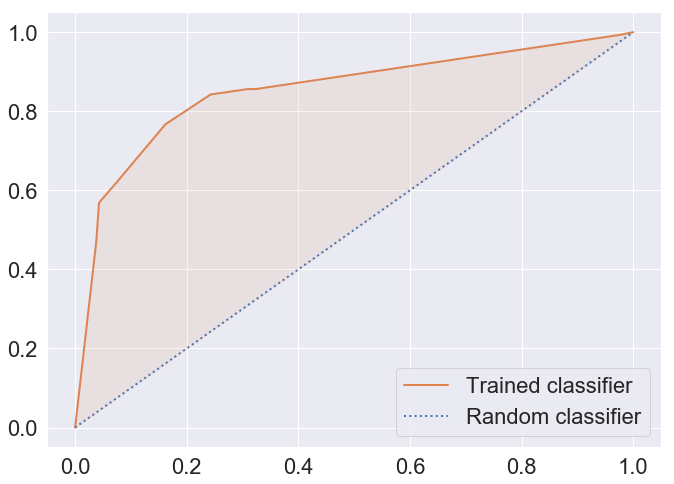

In [189]:
plt.figure(figsize=(11, 8))

plt.plot(fpr, tpr, color='C1', lw=2, label='Trained classifier')
plt.fill_between(fpr, tpr, fpr, alpha=0.1, color='C1')

plt.plot([0, 1], [0, 1], color='C0', lw=2, linestyle=':', label='Random classifier')

plt.legend()

plt.show()

### Area under ROC cureve (ROC-AUC)

In *scikit-learn* there is special function **auc()** for calculating the area under curve defined by points

In [190]:
from sklearn.metrics import auc

The metrics generalize a graph of ROC curve
* characterize the classifier quality with all thresholds $\tau$

In [191]:
auc(fpr, tpr)

0.8518917155903456

### Precision and recall

**Precision** of classifier is relation $\tfrac{TP}{TP + FP} \approx P(C_x = 1\mid h(x) = 1)$

Fraction of observations with actual class `1` of all obeservations labeled with predicted class `1`

Precision is a measure of result relevancy.

In [192]:
from sklearn.metrics import precision_score

precision_score(test_y, test_predictions)  # tp / (tp + fp)

0.8504672897196262

**Recall** of classifier is $\tfrac{TP}{TP + FN} \approx P(h(x) = 1\mid C_x = 1)$.

In [193]:
from sklearn.metrics import recall_score

recall_score(test_y, test_predictions)  # tp / (tp + fn)

0.6232876712328768

<br> <!-- Умышленно пустая ячейка -->

### Metrics $F_1$

Metrics $F_1$ (special case of $F_\beta$ when $\beta = 1$) aggregates precision and recall into single value

* harmonic mena of precision and recall
$$
    F_1 = 2 \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
\,. $$

In [194]:
from sklearn.metrics import f1_score

f1_score(test_y, test_predictions)

0.7193675889328063

Metrics $F_1$ respects balance between **precision** and **recall**

* takes low values for classifier with low accuracy and recall
* ignores **true negative** predictions (**TN**)

<br> <!-- Умышленно пустая ячейка -->

### Precision-Recall curve and area under it

Show dependence accuracy and recall of classification threshold

In [195]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(test_y, test_scores)

In [196]:
from sklearn.metrics import average_precision_score

average_precision_score(test_y, test_scores)  # auc(recall, precision)

0.7887836243872945

Plot the precison-recall curve и линии уровня метрики $F_1$

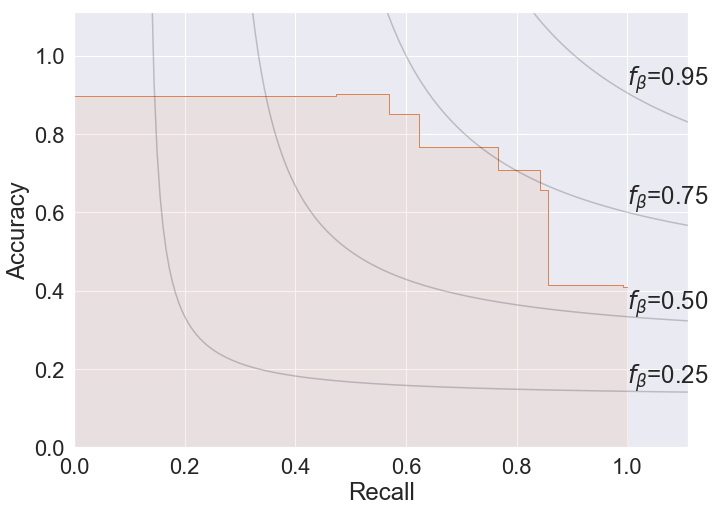

In [199]:
def plot_iso_fbeta(beta=1.0, ax=None):
    ax = plt.gca() if ax is None else ax

    # values of contour line
    f_scores = [0.25, 0.5, 0.75, 0.95]
    recall = np.linspace(1e-5, 1.11, 201)

    for f_score in f_scores:
        # accuracy depending on recall
        precision = f_score * recall / (recall + beta * beta * (recall - f_score))

        mask = precision >= 0
        ax.plot(recall[mask], precision[mask], color='black', alpha=0.2)

        label_pos = recall[180], precision[180] + 0.02
        ax.annotate(f'$f_\\beta$={f_score:0.2f}', xy=label_pos)

plt.figure(figsize=(11, 8))

plt.step(recall, precision, color='C1', where='post', lw=1)
plt.fill_between(recall, precision, alpha=0.1, color='C1', step='post')
plot_iso_fbeta()

plt.xlim(0.0, 1.11) ; plt.ylim(0.0, 1.11)
plt.xlabel('Recall') ; plt.ylabel('Accuracy')


plt.show()

The closer **PR** to the **right top** corner of the plot the better quality of classifier.

# Boston housing dataset (regression)

Housing Values in Suburbs of Boston. **medv** is the target _numerical_ variable we are trying to predict.

**medv** — median value of owner-occupied homes in \$1000s.

In [3]:
df = pd.read_csv('boston/train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


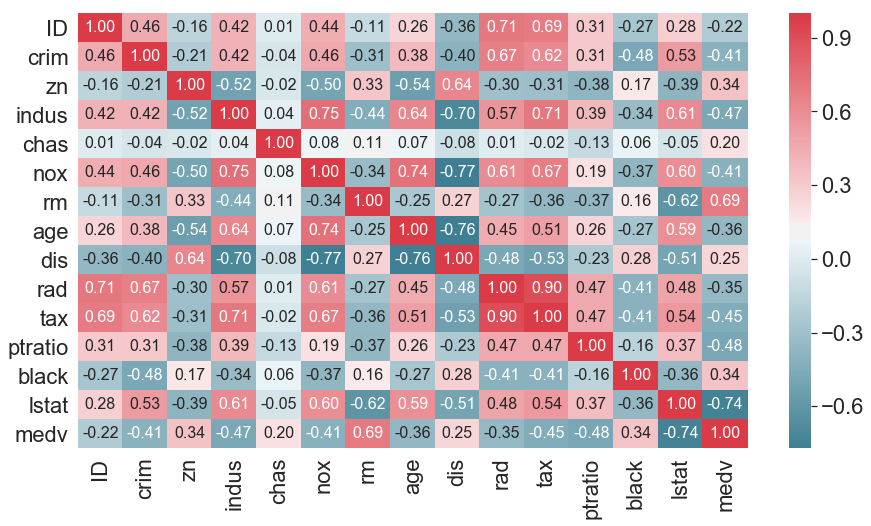

In [8]:
f, ax = plt.subplots(figsize=(15, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr = df.corr()

sns.heatmap(corr, cmap=cmap, annot=True, fmt='.2f', annot_kws={"size": 16});

In [13]:
X, y = df.drop('medv', axis=1), df['medv']

In [12]:
X.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


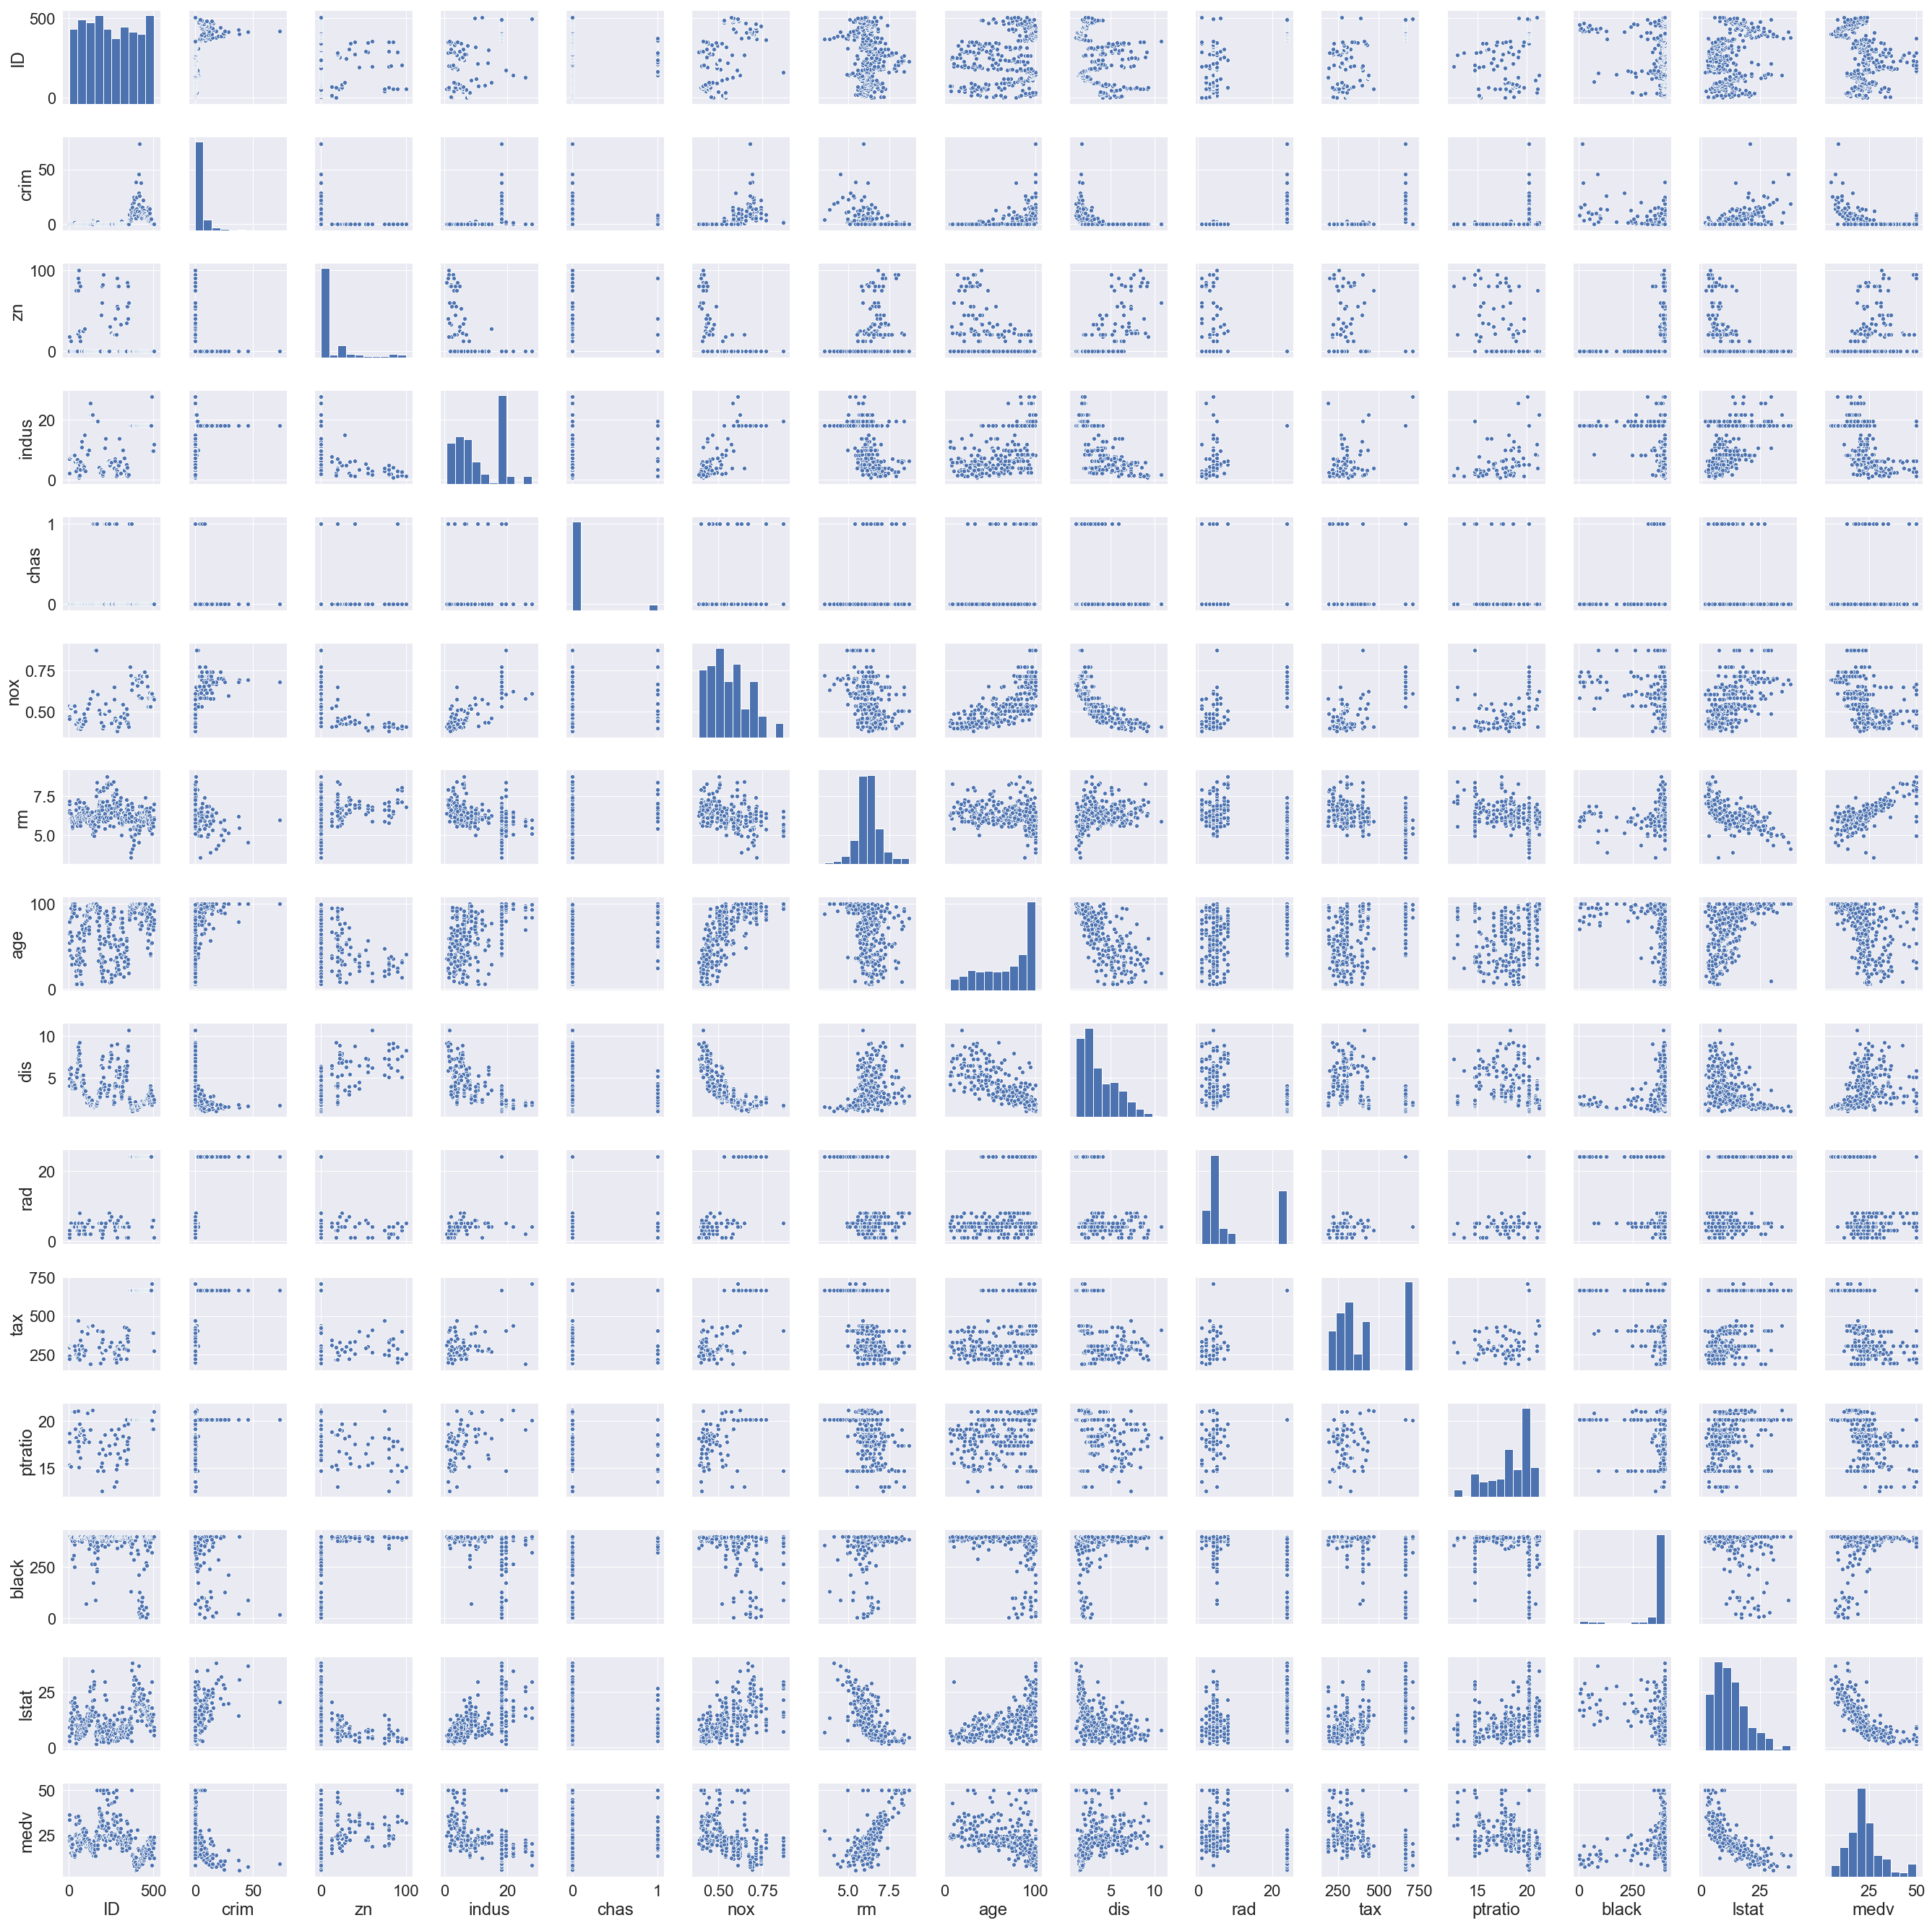

In [20]:
sns.set(font_scale=2)
sns.pairplot(df);

# Feature importance of regressor

The importance of a feature is the increase in the prediction error of the model after we permuted the feature’s values, which breaks the relationship between the feature and the true outcome.

We measure the importance of a feature by calculating the increase in the model's prediction error after permuting the feature
* A feature is **important** if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction
* A feature is **unimportant** if shuffling its values leaves the model error unchanged, because in this case the model ignored the feature for the prediction.

Let's use decision tree as a regressor for predict 

In [146]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

regr_d2 = DecisionTreeRegressor(max_depth=2)
regr_d5 = DecisionTreeRegressor(max_depth=5)
regr_d8 = DecisionTreeRegressor(max_depth=8)
regr_d2.fit(X, y)
regr_d5.fit(X, y)
regr_d8.fit(X, y);

In [121]:
regr_d2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.74671779, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.25328221])

In [122]:
regr_d5.feature_importances_

array([0.01362519, 0.02884194, 0.        , 0.        , 0.        ,
       0.0105431 , 0.61466764, 0.00741079, 0.07595672, 0.00678247,
       0.00999956, 0.00071345, 0.00397593, 0.2274832 ])

In [124]:
X.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

In [129]:
features = dict(zip(X.columns, regr_d5.feature_importances_))

In [130]:
importance = sorted(features.items(), key=lambda kv: kv[1])
importance

[('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('ptratio', 0.0007134478513189885),
 ('black', 0.0039759326370813084),
 ('rad', 0.00678246744648734),
 ('age', 0.007410794607219475),
 ('tax', 0.009999561075452714),
 ('nox', 0.010543097310644773),
 ('ID', 0.013625189934707115),
 ('crim', 0.028841941895365333),
 ('dis', 0.0759567189462338),
 ('lstat', 0.22748320419583387),
 ('rm', 0.6146676440996552)]

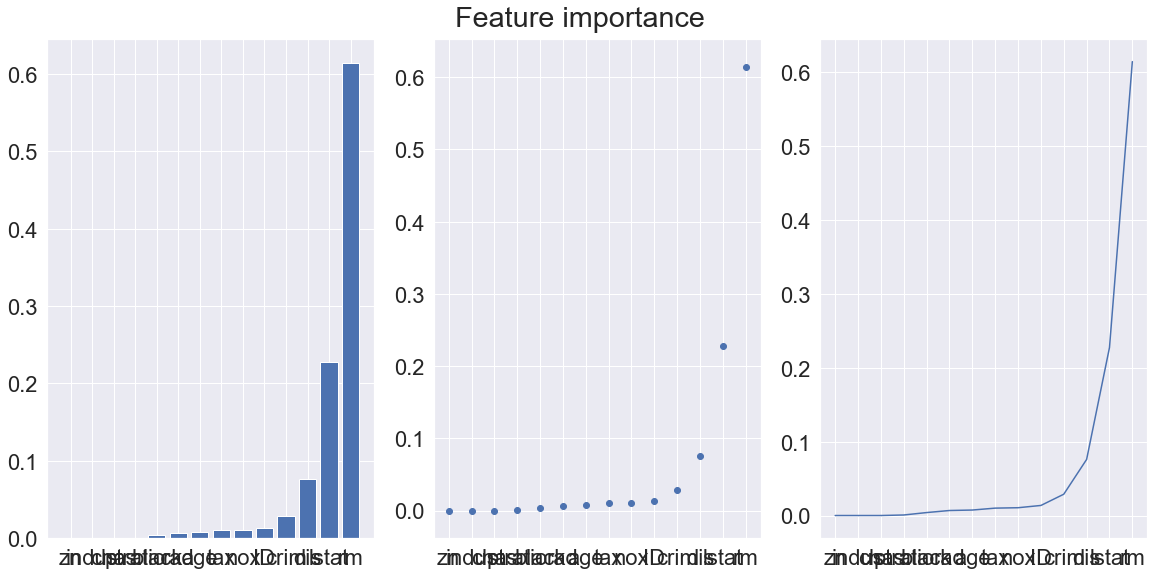

In [131]:
# TODO: use plot(), bar(), and scatter() of axs[i] to plot features importance

# fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=False, constrained_layout=True)
# fig.suptitle('Feature importance')

# labels = 
# values = 


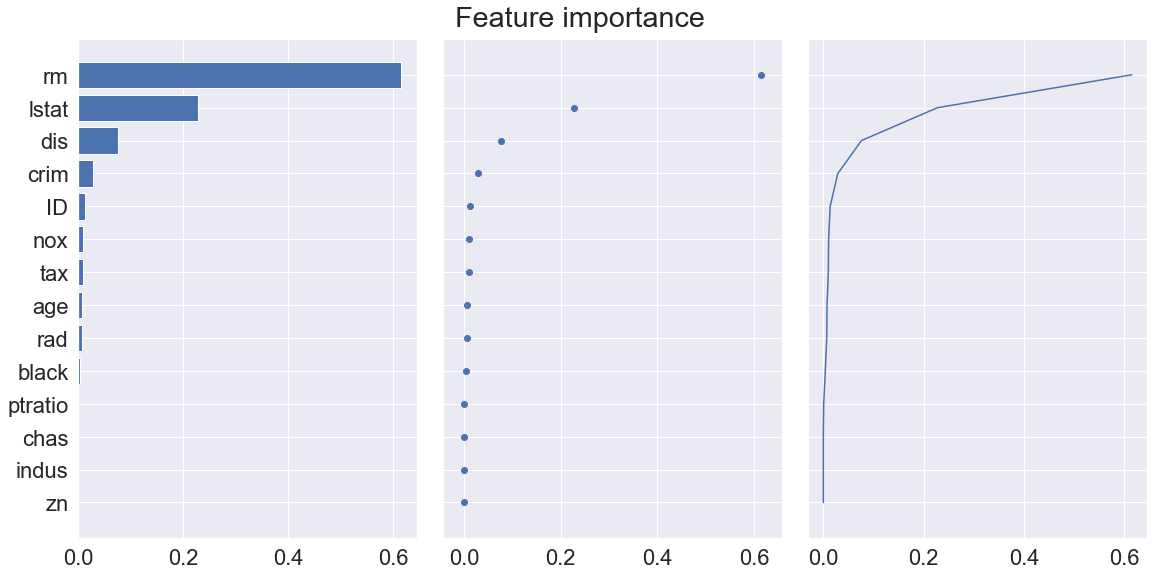

In [132]:
# TODO: Exchange axis X&Y, use plot(), barh(), and scatter(). Try to share axis Y (labels of features) between all plots


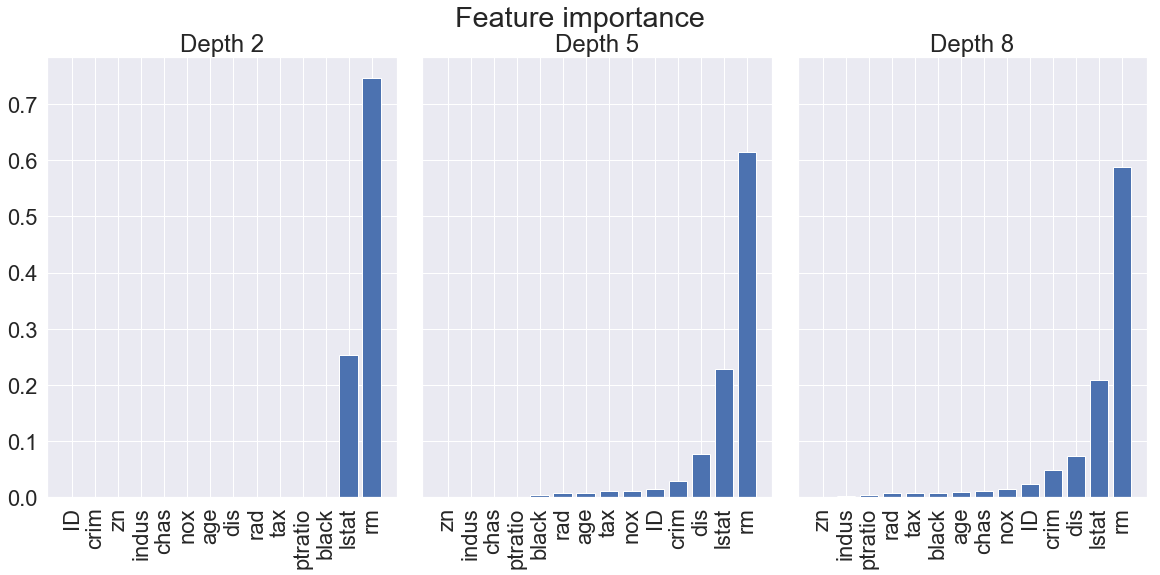

In [145]:
# TODO: Leave only barplot type of graphs and fill each of them by importance of 3 samples of regressor (with depth of tree 2, 5, and 8)
# Try to rotate each tick label to vertical orientation. Use get_xticklabels() of axs[i] and set_rotation() of each tick


---
# Homework

* Line up corresponding bars from bar plots for depth 5 and 8 next to each other on the same bar plot

Optional:
* Annotate each bar with its value on top